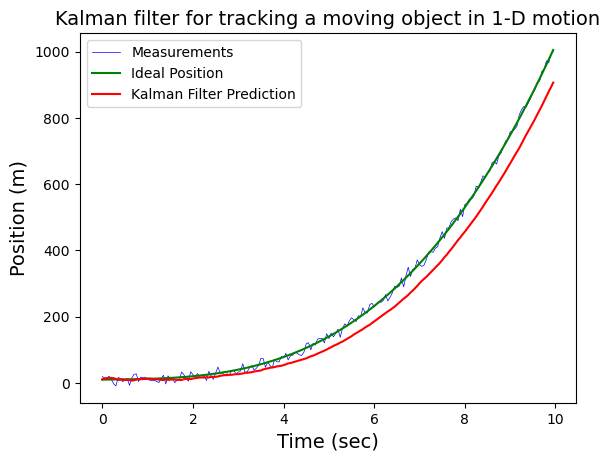

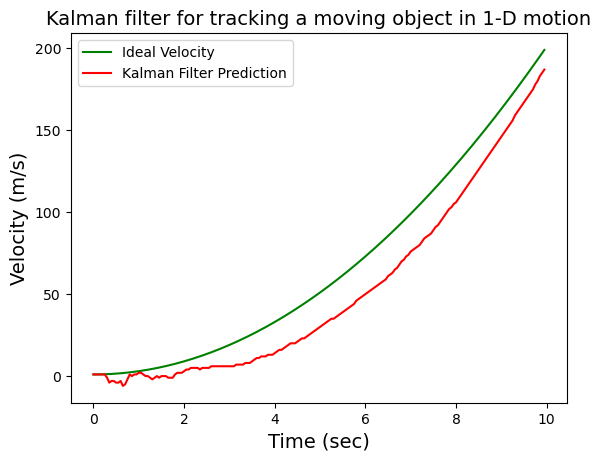

In [1]:
import numpy as np             
import matplotlib.pyplot as plt

t2 = 0
class KalmanFilter(object):
    def __init__(self, dt,std_acc, std_meas,t2):
        self.t2 = t2
        self.dt = dt # discrete time step (Unit: sec)
        self.std_acc = std_acc # standard deviation of the acceleration
        self.A = np.matrix([[1, self.dt,(self.dt**2)/2], # State Transition Matrix : A ------------------
                            [0, 1,self.dt],
                            [0,0,0]])
        self.B = np.matrix([[0],[0],[2]]) # Control Input Matrix : B ----- 
        self.H = np.matrix([[1,0,0]]) # Transformation matrix : H --------------------------
        # Process noise covariance Matrix : Q
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2,(self.dt**2)/2 ],
                            [(self.dt**3)/2, self.dt**2, self.dt],
                              [(self.dt**2)/2, self.dt, 1]]) * self.std_acc**2
        # Measurement noise covariance Matrix : R
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1]) # Initialize Error Covariance: P
        self.x = np.matrix([[10],[1],[0]]) # Initialize State Vector : x
        
    def PredictUpdate(self):
        # Eq.(1): Prediction Update for state at each time step
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.t2)
        # Eq.(2): Calculate Priori Error Covariance: P = A*P*A' + Q
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x
        
    def MeasurementUpdate(self, z):
        # Eq.(3): Measurement Update for compute Kalman Gain: S = H*P*H'+R 
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Eq.(3): Kalman Gain: K = P * H'* inv(H*P*H'+R)
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  
        # Eq.(4): Calculate Posteriori State Estimate
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  
        # Eq.(5): Calculate Posteriori Error Covariance 
        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P
        return self.P

dt = 0.05 # discrete time step (Unit: sec)
u= 2 # constant acceleration (Unit: m/s^2)
v0 = 1
x0 = 10
t = np.arange(0, 10, dt) # discrete time

Ideal_Motion =x0 + (v0*t) + 0.5*u*(t**3) # generate an Ideal Motion Path
Ideal_Vel = v0 + u*t**2 # generate an Ideal Velocity

std_acc = 0.3    # the standard deviation of the acceleration (Unit: m/s^2)
std_meas = 1.2    # the standard deviation of the position measurement noise (Unit: m)
# create KalmanFilter object
kf = KalmanFilter(dt,std_acc, std_meas,t2)

predictions = []  # initialize empty prediction update
predictPos = []   # initialize Position prediction
predictVel = []   # initialize Velocity prediction
measurements = [] # initialize empty measurement update
PosMeasurements = [] # initialize Position measurement 
ErrorCovPos = []  # intitialize empty priori error covariance of Position
ErrorCovVel = []  # intitialize empty priori error covariance of Velocity
i=0   

for t2 in t:
    x = Ideal_Motion[i]
    # Mesurement at each time step
    z = (kf.H * x) + np.random.normal(0, 10)
    PosMeasurements.append(z.item(0))
    # Kalman Filter: Prediction Update
    predictions.append(kf.PredictUpdate())
    predictPos.append(predictions[i].item((0)))
    predictVel.append(predictions[i].item((1)))
    # Kalman Filter: Measurement Update
    measurements.append(kf.MeasurementUpdate(z.item(0)))
    ErrorCovPos.append(measurements[i].item(0,0))
    ErrorCovVel.append(measurements[i].item(1,1))
    i=i+1

plt.figure(1)
plt.title('Kalman filter for tracking a moving object in 1-D motion', fontsize=14)
plt.plot(t, PosMeasurements, label='Measurements', color='b',linewidth=0.5)
plt.plot(t, np.array(Ideal_Motion), label='Ideal Position', color='g', linewidth=1.5)
plt.plot(t, predictPos, label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (sec)', fontsize=14), plt.ylabel('Position (m)', fontsize=14)
plt.legend()

plt.figure(2)
plt.title('Kalman filter for tracking a moving object in 1-D motion', fontsize=14)
plt.plot(t, np.array(Ideal_Vel), label='Ideal Velocity', color='g', linewidth=1.5)
plt.plot(t, predictVel, label='Kalman Filter Prediction', color='r', linewidth=1.5)
plt.xlabel('Time (sec)', fontsize=14), plt.ylabel('Velocity (m/s)', fontsize=14)
plt.legend()

plt.show()